# HTTP Request

https://crunchify.com/specifications-methods-in-restful-web-service/

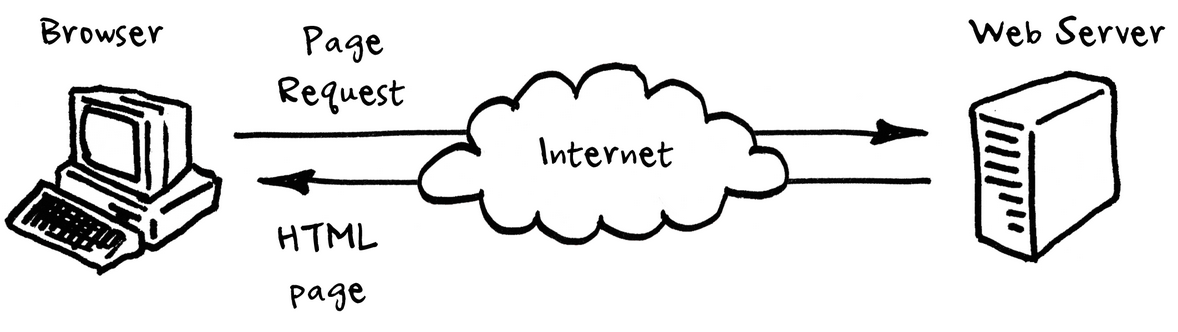

- GET
- POST (New Data e.g. Register, search)
- PUT (Update)
- DELETE
- PATCH (Update)

# REST API

https://images.tutorialedge.net/uploads/rest-api.png


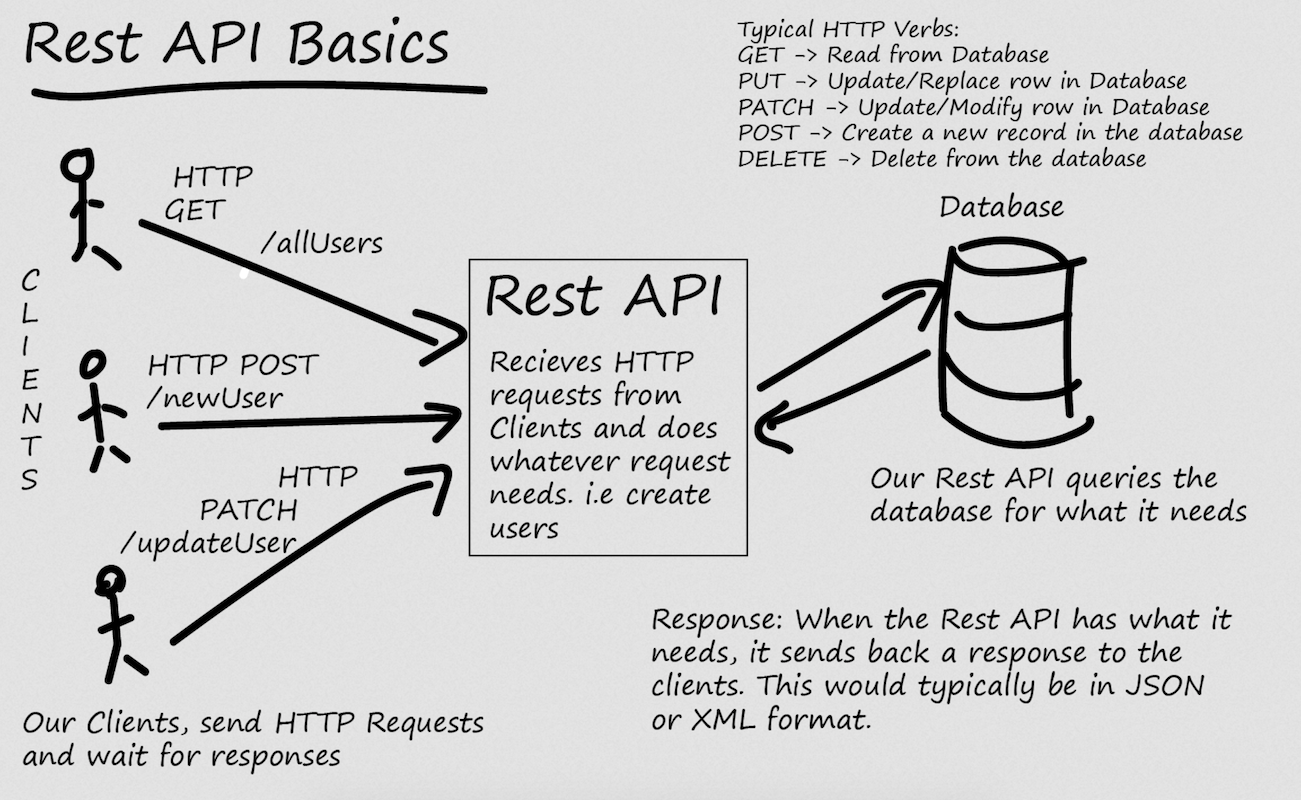

Ketika memanggil sebuah web service, terdapat **HTTP method** (GET, POST, PUT, DELETE) & **HTTP request** yang dikirimkan.

# JSON
Sebuah format/cara representasi data

```
{
  "petal_width": 0.8,
  "petal_length": 0.9,
  "sepal_width": 0.1,
  "petal_length": 10
}
```





```
{
  "output": "Iris-Versicolor"
}
```



1. User membuat sebuah request dalam bentuk JSON
2. Request dikirim ke web server
3. Web server menerima & memproses data
4. Web server mengembalikan response dalam bentuk JSON

# Cara Implementasi di Python

In [1]:
!pip install flask-ngrok

https://medium.com/@kshitijvijay271199/flask-on-google-colab-f6525986797b


In [2]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [8]:
app = Flask(__name__) # Membuat sebuah object Flask

@app.route("/home")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"

In [5]:
from flask import jsonify, request

In [6]:
@app.route('/classify', methods=['POST'])
def classification():
  sepal_width = float(request.json['sepal_width'])
  sepal_length = float(request.json['sepal_length'])
  petal_length = float(request.json['petal_length'])
  petal_width = float(request.json['petal_width'])

  if sepal_width < 0.5 and petal_length > 0.6:
    output_class = "Iris-Versicolor"
  else:
    output_class = "Iris-Virginica"

  return jsonify({
      "output": output_class
  })

localhost

In [9]:
run_with_ngrok(app)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://d76fb25e8949.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


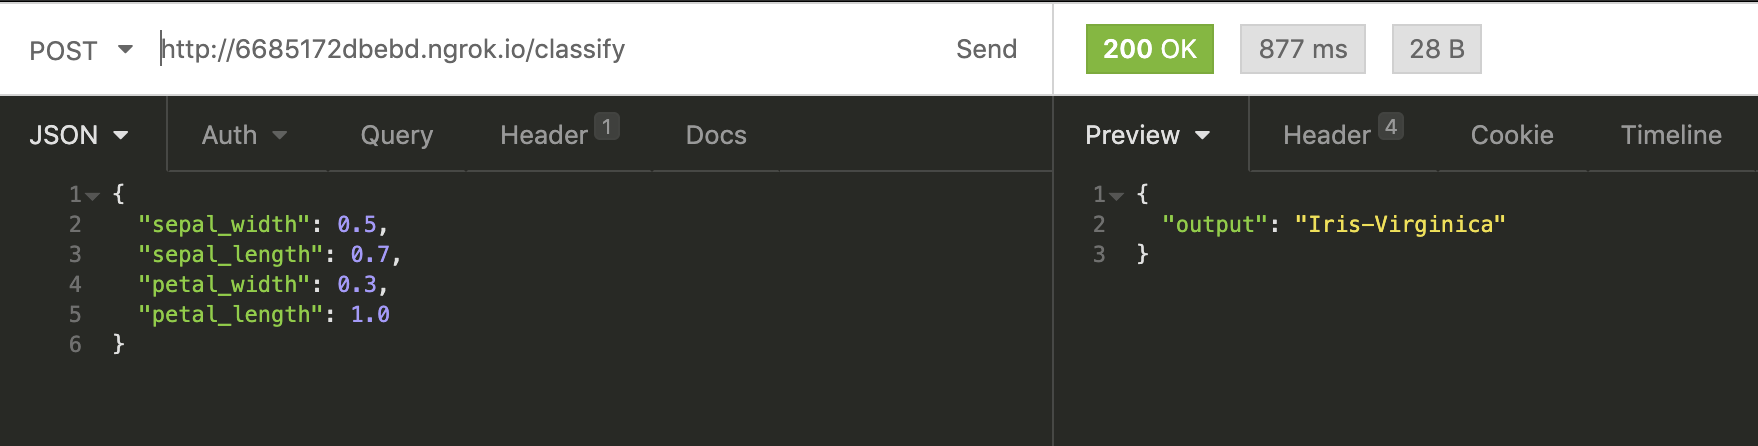

**Catatan**: 

Gunakan software seperti Postman atau Insomnia untuk melakukan testing terhadap web service.

https://www.postman.com/
https://insomnia.rest/


# Contoh Memanggil Web Service Secara Langsung

In [11]:
import requests
import json

In [18]:
url = 'http://5bd20aa098b3.ngrok.io/classify'

data = {
	"sepal_width": 0.5,
	"sepal_length": 0.7,
	"petal_width": 0.3,
	"petal_length": 1.0
}

json_response = requests.post(url, json=data)

json_response
response = json.loads(json_response.text)

In [20]:
response['output']

'Iris-Virginica'

# Assignment

Buatlah sebuah endpoint yang sama seperti diatas, namun melakukan prediksi dari model yang kita training! 

Gunakan library `pickle` untul save & load model dan lakukan prediksi! 

Pastikan hasil output yang diberikan adalah hasil output klasifikasi yang benar!

# Bonus Assignment

Buatlah sebuah endpoint untuk melakukan prediksi terhadap digits. Perhatikan hal-hal berikut:
  1. Menerima gambar digit sebagai request, lalu meneruskannya untuk dilakukan prediksi
  2. Load model dari file *.h5 yang disimpan untuk melakukan prediksi, menggunakan function `load_weights`
  3. Mengeluarkan output yaitu class dari gambar yang diupload.